<a href="https://colab.research.google.com/github/nicolezhu2020/covid-19-data/blob/master/HW3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3.1: Fashion MNIST image classification with MLPs

In this homework, you will continue to build neural networks like last time (the end of 2.1). Specifically, you will continue to build Multi-Layer Perceptrons (MLPs, or fully-connected DNNs) to classify images from the Fashion MNIST data set using the tensorflow Keras framework.

Both the data and the model are similar to those in HW2.1. Since this is a continuation from HW2.1, minimal instructions will be given on how you want to do it, except to say: I challenge you to build a neural network model that can achieve greater than 90% accuracy on test data! (some tips will be given:)

## Getting the data

Fashion MNIST is a dataset from online fashion retailer Zalando consisting of a training set of 60,000 examples and a test set of 10,000 examples, where each example is a 28x28 grayscale image belonging to one of 10 possible classes (such as a t-shirt, dress, etc).

The 10 class labels:

| Label | Description   |
| ----- |:-------------:|
| 0     | T-shirt/top   |
| 1     | Trouser       |   
| 2     | Pullover      |  
| 3     | Dress         |
| 4     | Coat          |   
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |   
| 8     | Bag           |  
| 9     | Ankle boot    |  

In [ ]:
# getting the dataset
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### Note: your goal is to achieve greater than 90% accuracy on the `X_test` data. Let's look at the data first.

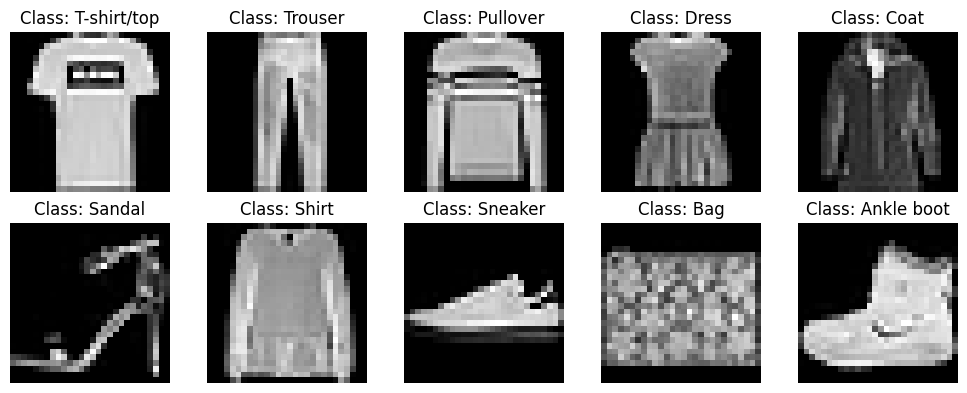

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')

plt.tight_layout()

## Build and train your model

1. You will talk through the same steps as last time to first preprocess your data and prepare for the input to the model.
2. Build out your model layers by adding a bunch of `Dense` layers (you can start with 2 hidden layers excluding the output layer). Note that for the first Dense layer, you will need to specify the input shape. All Dense layers should have a `relu` activation except for the last one, which is the output layer (what activation should it have?). Similarly, all Dense layers should have a large number of neurons such as 256 or 512 or 1024, except the last output layer (how many neurons should it have?). You can start with a small number and you can experiment with larger numbers to see if it makes a difference.
3.  Once you built your model, you should also print out the model summary to see the layers. Please use a model that is under or around 1 million parameters to achieve the 90% accuracy.
4.  Compile your model with `loss='categorical_crossentropy', optimizer='adam'`.
5.  To improve the model performance, try these things:
  - add a `Dropout()` layer to prevent overfitting. One dropout layer can be added after each Dense layer with a relu activation, except for the final layer.
  - increase the number of neurons per layer;
  - adding more layers;
  - train your model for more epochs;
  - adjust your batch size;
  - please do not conduct a grid search for your hyperparameters(i.e.don't test all combinations of the hyperparameters). You should randomly sample a single hyperparameter in conjunction with a randomly sampled or fixed second hyperparameter.

6. Similar to last time, you should use Tensorboard to monitor your training.

# Understanding your model performance

1. Use these tools to print out the per class performance of your model, and the confusion matrix:

`from sklearn.metrics import classification_report, confusion_matrix`

2. It's often useful to inspect the examples in test data where the model predicted incorrectly. Use the visualization code from above, inspect several (less than 10) example images where the model got wrong. Do they make sense?

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import datetime

In [ ]:
# check the shape of the data
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [ ]:
# flatten the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# normalize the data

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:


# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)




In [ ]:
# Define the model architecture
model = Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Flatten the input images
model.add(Dense(512, activation='relu'))  # Increase number of neurons in the first layer
model.add(Dropout(0.2))  # Add Dropout to prevent overfitting
model.add(Dense(256, activation='relu'))  # Add another hidden layer with more neurons
model.add(Dropout(0.2))  # Add Dropout to prevent overfitting
model.add(Dense(128, activation='relu'))  # Add another hidden layer with more neurons
model.add(Dropout(0.2))  # Add Dropout to prevent overfitting
model.add(Dense(128, activation='relu'))  # Add another hidden layer with more neurons
model.add(Dropout(0.2))  # Add Dropout to prevent overfitting
model.add(Dense(10, activation='softmax'))  # Output layer





In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Set up TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_accuracy)


Epoch 1/20
375/375 [==============================] - 12s 24ms/step - loss: 0.6514 - accuracy: 0.7645 - val_loss: 0.4365 - val_accuracy: 0.8390
Epoch 2/20
375/375 [==============================] - 7s 20ms/step - loss: 0.4370 - accuracy: 0.8461 - val_loss: 0.4095 - val_accuracy: 0.8551
Epoch 3/20
375/375 [==============================] - 6s 17ms/step - loss: 0.3943 - accuracy: 0.8596 - val_loss: 0.3712 - val_accuracy: 0.8633
Epoch 4/20
375/375 [==============================] - 7s 20ms/step - loss: 0.3694 - accuracy: 0.8652 - val_loss: 0.3361 - val_accuracy: 0.8786
Epoch 5/20
375/375 [==============================] - 9s 23ms/step - loss: 0.3507 - accuracy: 0.8724 - val_loss: 0.3352 - val_accuracy: 0.8789
Epoch 6/20
375/375 [==============================] - 7s 19ms/step - loss: 0.3384 - accuracy: 0.8765 - val_loss: 0.3474 - val_accuracy: 0.8752
Epoch 7/20
375/375 [==============================] - 8s 20ms/step - loss: 0.3196 - accuracy: 0.8836 - val_loss: 0.3377 - val_accuracy: 0.877